# Proyek Analisis Data: Bike Sharing Rental

---


- **Nama:** Salim Husaini
- **Email:** husainisalim10@gmail.com
- **ID Dicoding:** salimhu

## Menentukan Pertanyaan Bisnis

- Question 1: Are there differences between cyclists in sunny, cloudy and snowy weather?
- Question 2: do people cycle more on holidays or workingdays?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
df = pd.read_csv("dashboard/day.csv", delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      731 non-null    int64  
 1   date         731 non-null    object 
 2   season       731 non-null    object 
 3   year         731 non-null    int64  
 4   month        731 non-null    int64  
 5   holiday      731 non-null    int64  
 6   weekday      731 non-null    int64  
 7   workingday   731 non-null    int64  
 8   weathers     731 non-null    int64  
 9   temperature  731 non-null    float64
 10  atemp        731 non-null    float64
 11  humidity     731 non-null    float64
 12  windspeed    731 non-null    float64
 13  casual       731 non-null    int64  
 14  registered   731 non-null    int64  
 15  count        731 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.5+ KB


### Assessing Data

In the assessing data stage, we now see whether the data we have obtained has missing values, duplicate data, and so on.

In [6]:
df = pd.read_csv("dashboard/day.csv")
df.isnull().sum()

instant        0
date           0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weathers       0
temperature    0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [7]:
df = pd.read_csv("dashboard/day.csv")
df.isna().sum()

instant        0
date           0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weathers       0
temperature    0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [8]:
print("duplicated data: ", df.duplicated().sum())

duplicated data:  0


In [9]:
df.describe()

,instant,year,month,holiday,weekday,workingday,weathers,temperature,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [11]:
df['date'] = pd.to_datetime(df['date'])

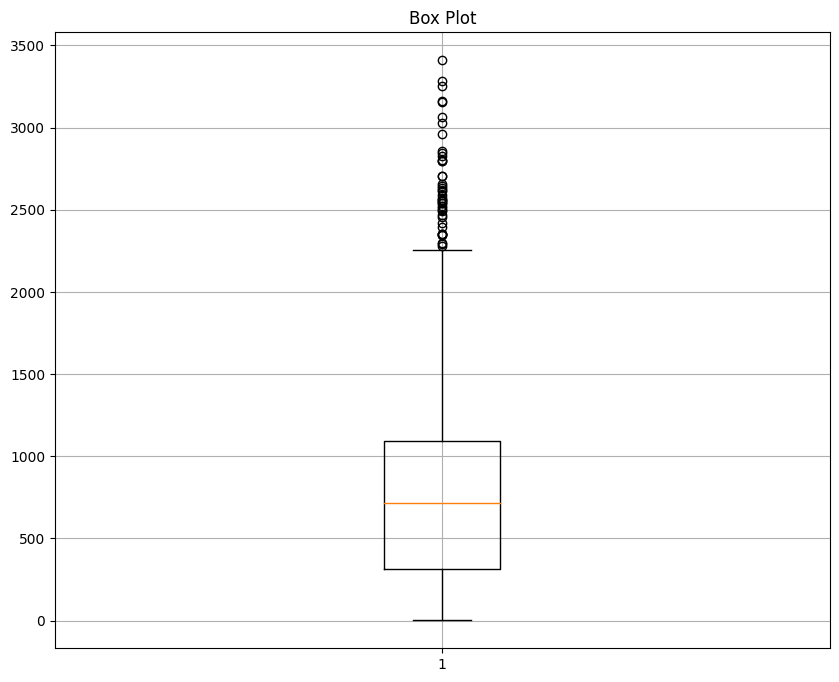

In [38]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['casual'])
plt.title('Box Plot')
plt.ylabel(None)
plt.xlabel(None)
plt.grid(True)
plt.show()

In [39]:
df.dropna(inplace=True)

In [12]:
data=pd.read_csv('dashboard/day.csv')

data.interpolate(method='linear', limit_direction='forward', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19272\1471461082.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', limit_direction='forward', inplace=True)


In [13]:
df.rename(columns={'dteday' : 'date', 'yr' : 'year', 'mnth' : 'month', 'hr' : 'hour', 'hum' : 'humidity', 'cnt' : 'count' }, inplace=True)

In [14]:
print(df.head())

   instant       date    season  year  month  holiday  weekday  workingday  \
0        1 2011-01-01  springer     0      1        0        6           0   
1        2 2011-01-02  springer     0      1        0        0           0   
2        3 2011-01-03  springer     0      1        0        1           1   
3        4 2011-01-04  springer     0      1        0        2           1   
4        5 2011-01-05  springer     0      1        0        3           1   

   weathers  temperature     atemp  humidity  windspeed  casual  registered  \
0         2     0.344167  0.363625  0.805833   0.160446     331         654   
1         2     0.363478  0.353739  0.696087   0.248539     131         670   
2         1     0.196364  0.189405  0.437273   0.248309     120        1229   
3         1     0.200000  0.212122  0.590435   0.160296     108        1454   
4         1     0.226957  0.229270  0.436957   0.186900      82        1518   

   count  
0    985  
1    801  
2   1349  
3   1562  
4

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    object        
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathers     731 non-null    int64         
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: datet

In [16]:
print(df.describe())

          instant                 date        year       month     holiday  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.500684    6.519836    0.028728   
min      1.000000  2011-01-01 00:00:00    0.000000    1.000000    0.000000   
25%    183.500000  2011-07-02 12:00:00    0.000000    4.000000    0.000000   
50%    366.000000  2012-01-01 00:00:00    1.000000    7.000000    0.000000   
75%    548.500000  2012-07-01 12:00:00    1.000000   10.000000    0.000000   
max    731.000000  2012-12-31 00:00:00    1.000000   12.000000    1.000000   
std    211.165812                  NaN    0.500342    3.451913    0.167155   

          weekday  workingday    weathers  temperature       atemp  \
count  731.000000  731.000000  731.000000   731.000000  731.000000   
mean     2.997264    0.683995    1.395349     0.495385    0.474354   
min      0.000000    0.000000    1.000000     0.059130    0.079070   
25%      1.000000

## Exploratory Data Analysis (EDA)

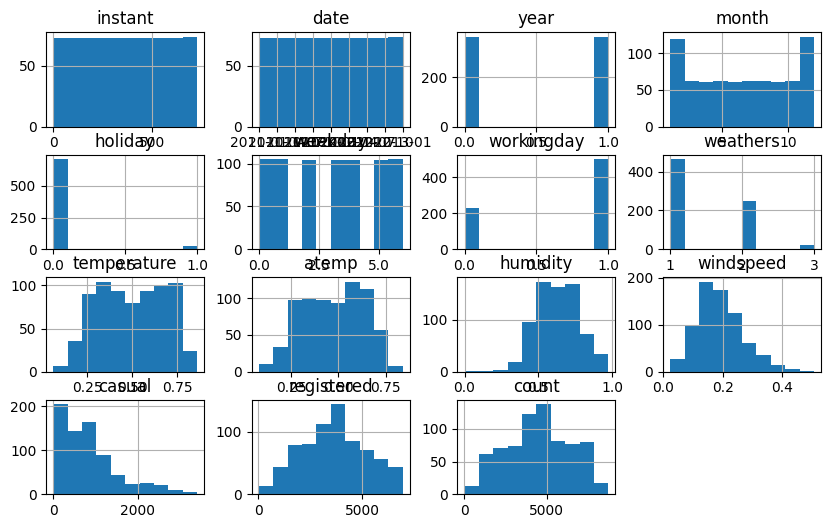

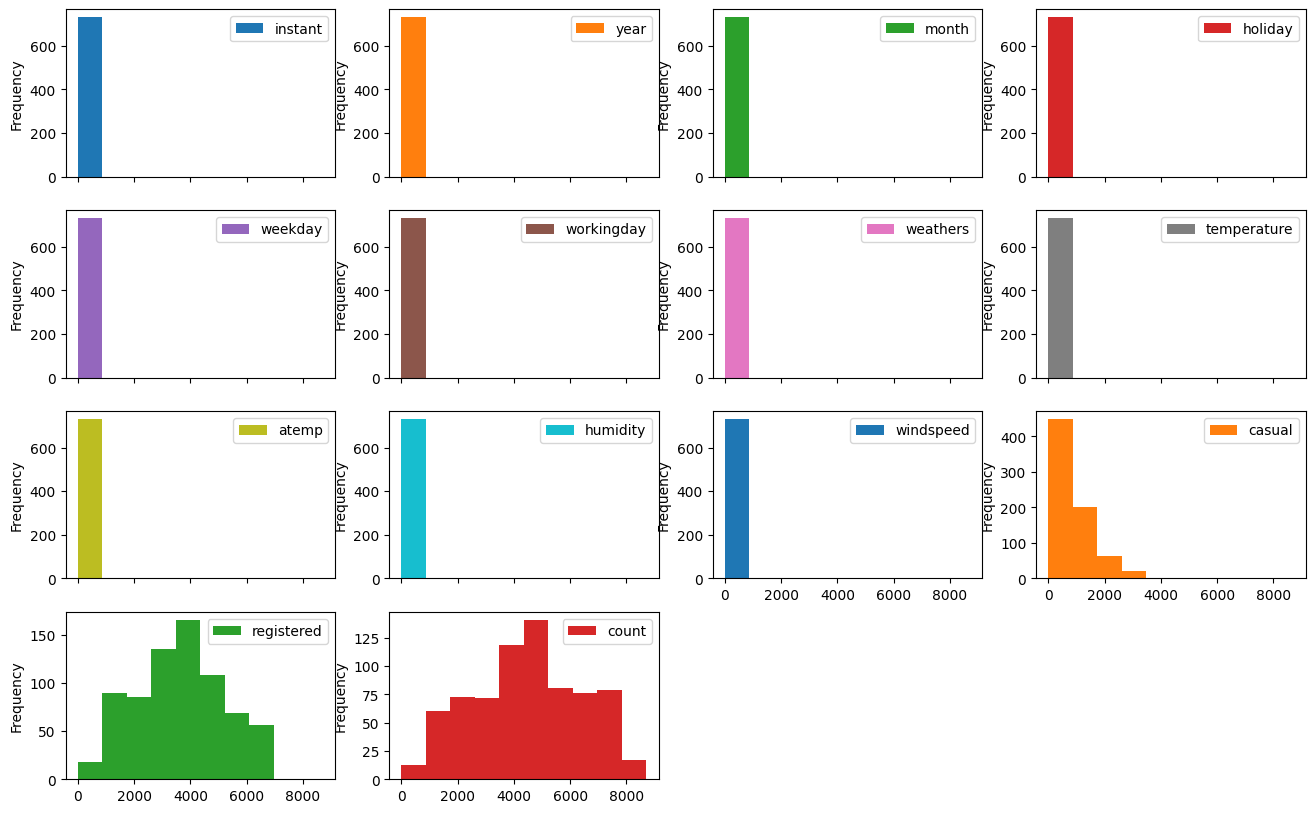

In [18]:
df.hist(figsize=(10, 6))
plt.show()

df.plot(kind='hist', subplots=True, layout=(4,4), figsize=(16, 10))
plt.show()

In [55]:
df.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Visualization & Explanatory Analysis

### Question 1: Is there a difference in cyclists between sunny, cloudy, and snow?

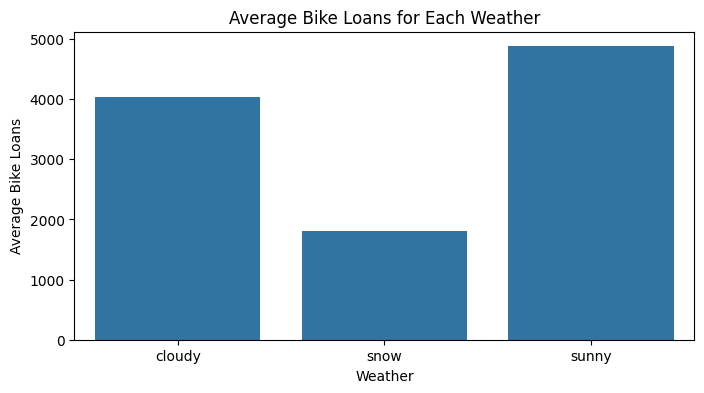

In [8]:
df['weather_name'] = df['weathers'].map({1: 'sunny', 2: 'cloudy', 3: 'snow'})

weather_analysis = df.groupby('weather_name').agg({
    'count': 'mean',
    'temperature': 'mean'
}).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='weather_name', y='count', data=weather_analysis)
plt.title('Average Bike Loans for Each Weather')
plt.xlabel('Weather')
plt.ylabel('Average Bike Loans')
plt.show()

From the visualization above, it is indicated that there are more cyclists in the sunny season, then in the cloudy season, and the least in the snowy season.

### Question 2: do people cycle more on holidays or workingdays?

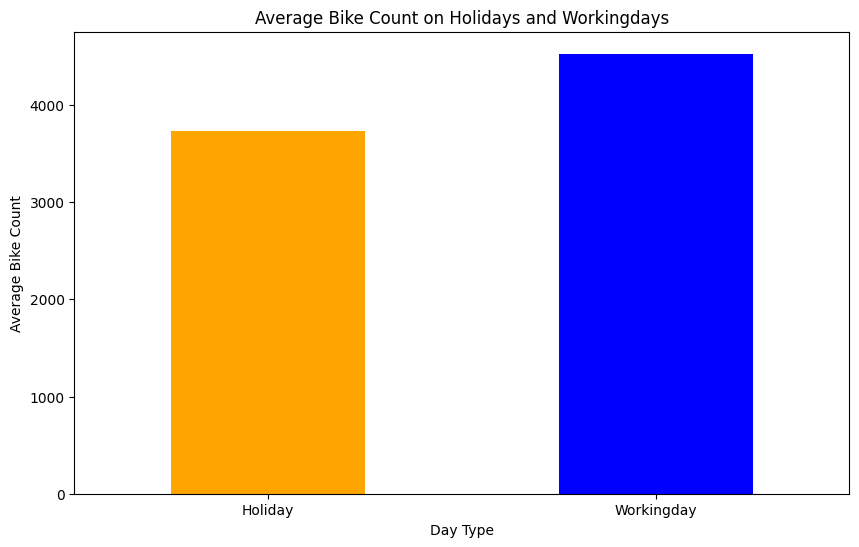

In [9]:
df['day_type'] = df['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Workingday')

# Calculate the average count of bikes for each day type
average_count_by_day_type = df.groupby('day_type')['count'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_count_by_day_type.plot(kind='bar', color=['orange', 'blue'])
plt.title('Average Bike Count on Holidays and Workingdays')
plt.xlabel('Day Type')
plt.ylabel('Average Bike Count')
plt.xticks(rotation=0)
plt.show()

From the visualization above, it is indicated that there are more cyclists on weekdays

## Conclusion

- Conclution question 1: The visual representation suggests a clear trend in cyclist numbers based on weather conditions. Specifically, the data indicates that the highest cyclist count occurs during the sunny season, followed by a comparatively lower count during the cloudy season. The snowy season records the least number of cyclists, highlighting a correlation between weather conditions and cycling activity, with sunny weather being the most favorable for biking.
- Conclution question 2: Based on the provided visualization, it is evident that there is a higher number of cyclists on weekdays compared to holidays.